In [1]:
import mysql.connector
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sqlalchemy import create_engine

In [2]:
# Database connection
db_config = {
    "host": "localhost",
    "user": "root",
    "password": "Nirdesh9903@",
    "database": "anime_db"
}

In [3]:
# Create connection
conn = mysql.connector.connect(**db_config)
cursor = conn.cursor()

In [4]:
# Create table query
create_table_query = """
CREATE TABLE IF NOT EXISTS anime (
    anime_id INT PRIMARY KEY,
    title VARCHAR(255) NOT NULL,
    genre VARCHAR(255) NOT NULL,
    rating DECIMAL(3,1),
    episodes INT,
    release_year INT
);
"""
cursor.execute(create_table_query)

In [5]:
# Insert Data
anime_data = [
    (1, 'Attack on Titan', 'Action, Fantasy', 9.0, 75, 2013),
    (2, 'Death Note', 'Thriller, Mystery', 8.9, 37, 2006),
    (3, 'Naruto', 'Action, Adventure', 8.3, 220, 2002),
    (4, 'One Piece', 'Adventure, Comedy', 8.8, 1000, 1999),
    (5, 'Demon Slayer', 'Action, Supernatural', 8.7, 26, 2019),
    (6, 'Fullmetal Alchemist: Brotherhood', 'Action, Fantasy', 9.1, 64, 2009),
    (7, 'Steins;Gate', 'Sci-Fi, Thriller', 9.0, 24, 2011),
    (8, 'Dragon Ball Z', 'Action, Adventure', 8.7, 291, 1989),
    (9, 'Hunter x Hunter', 'Action, Adventure', 9.0, 148, 2011),
    (10, 'My Hero Academia', 'Action, Superhero', 8.4, 138, 2016),
    (11, 'Tokyo Ghoul', 'Horror, Supernatural', 7.8, 48, 2014),
    (12, 'Sword Art Online', 'Action, Fantasy', 7.5, 96, 2012),
    (13, 'Bleach', 'Action, Supernatural', 8.1, 366, 2004),
    (14, 'Code Geass', 'Mecha, Thriller', 8.9, 50, 2006),
    (15, 'Re:Zero - Starting Life in Another World', 'Fantasy, Drama', 8.6, 50, 2016),
    (16, 'Vinland Saga', 'Action, Historical', 8.8, 48, 2019),
    (17, 'Spy x Family', 'Comedy, Action', 8.5, 25, 2022),
    (18, 'Chainsaw Man', 'Action, Horror', 8.6, 12, 2022),
    (19, 'Jujutsu Kaisen', 'Action, Supernatural', 8.8, 47, 2020),
    (20, 'Neon Genesis Evangelion', 'Mecha, Drama', 8.5, 26, 1995),
    (21, 'Solo Leveling Season 2', 'Action, Fantasy', 9.2, 12, 2025),
    (22, 'Kaiju No. 8: Mission Recon', 'Action, Sci-Fi', 8.8, 1, 2025),
    (23, 'My Hero Academia: Vigilantes', 'Action, Superhero', 8.5, 13, 2025),
    (24, 'Spy x Family Season 3', 'Action, Comedy', 8.9, 12, 2025),
    (25, 'Blue Exorcist Season 4', 'Action, Supernatural', 8.0, 12, 2025),
    (26, 'Attack on Titan: The Final Chapters', 'Action, Drama', 9.5, 10, 2024),
    (27, 'Jujutsu Kaisen Season 3', 'Action, Supernatural', 8.7, 24, 2024),
    (28, 'Demon Slayer: Infinity Castle Arc', 'Action, Fantasy', 9.3, 11, 2024),
    (29, 'One Piece: Final Voyage', 'Action, Adventure', 9.0, 14, 2024),
    (30, 'Chainsaw Man Season 2', 'Action, Horror', 8.6, 12, 2024)
]

In [6]:
# Insert data into MySQL
insert_query = "INSERT INTO anime (anime_id, title, genre, rating, episodes, release_year) VALUES (%s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE title=VALUES(title);"
cursor.executemany(insert_query, anime_data)
conn.commit()

In [7]:
# Fetch data for analysis
df = pd.read_sql("SELECT * FROM anime", conn)

C:\Users\nirde\AppData\Local\Temp\ipykernel_11504\1556145286.py:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql("SELECT * FROM anime", conn)


In [8]:
# Close MySQL connection
cursor.close()
conn.close()

In [9]:
df.head(20)

,anime_id,title,genre,rating,episodes,release_year
0,1,Attack on Titan,"Action, Fantasy",9.0,75,2013
1,2,Death Note,"Thriller, Mystery",8.9,37,2006
2,3,Naruto,"Action, Adventure",8.3,220,2002
3,4,One Piece,"Adventure, Comedy",8.8,1000,1999
4,5,Demon Slayer,"Action, Supernatural",8.7,26,2019
5,6,Fullmetal Alchemist: Brotherhood,"Action, Fantasy",9.1,64,2009
6,7,Steins;Gate,"Sci-Fi, Thriller",9.0,24,2011
7,8,Dragon Ball Z,"Action, Adventure",8.7,291,1989
8,9,Hunter x Hunter,"Action, Adventure",9.0,148,2011
9,10,My Hero Academia,"Action, Superhero",8.4,138,2016


In [10]:
df.shape # shape of data

(30, 6)

In [11]:
df.size # size of data

180

In [12]:
df.index # number of index 

RangeIndex(start=0, stop=30, step=1)

In [13]:
df.describe() # Statistical calculation

,anime_id,rating,episodes,release_year
count,30.000000,30.000000,30.000000,30.000000
mean,15.500000,8.590000,126.600000,2010.466667
std,8.803408,0.395099,197.944715,7.713550
min,1.000000,7.500000,10.000000,1989.000000
25%,8.250000,8.425000,25.000000,2006.000000
50%,15.500000,8.650000,48.000000,2011.000000
75%,22.750000,8.900000,145.500000,2016.000000
max,30.000000,9.100000,1000.000000,2022.000000


In [14]:
df.info() # information about data what type of data it's consist

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   anime_id      30 non-null     int64  
 1   title         30 non-null     object 
 2   genre         30 non-null     object 
 3   rating        30 non-null     float64
 4   episodes      30 non-null     int64  
 5   release_year  30 non-null     int64  
dtypes: float64(1), int64(3), object(2)
memory usage: 1.5+ KB


In [15]:
# checking the null value in data
df.isnull().sum()

anime_id        0
title           0
genre           0
rating          0
episodes        0
release_year    0
dtype: int64

### --------------------------------- ANALYSIS--------------------------------------- 

#### --------------------------------------Anime Rating Graph-----------------------------------------------

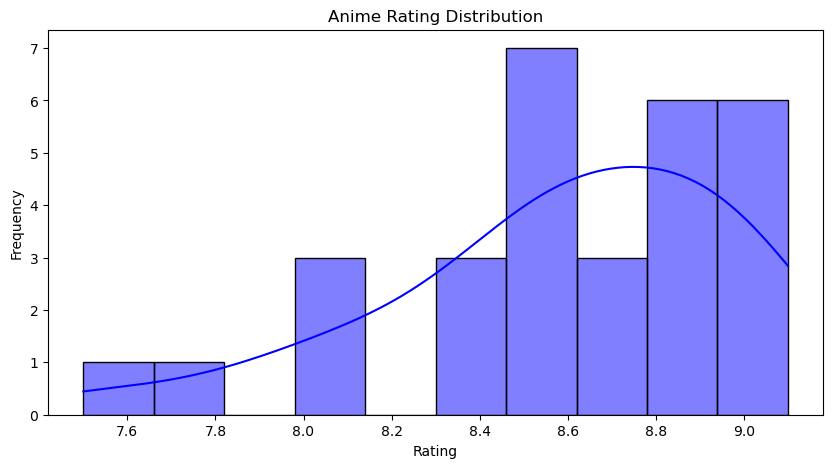

In [16]:
# Rating Distribution
plt.figure(figsize=(10, 5))
sns.histplot(df['rating'], bins=10, kde=True, color='blue')
plt.title('Anime Rating Distribution')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.show()

#### ----------------------------------------Top 10 highest rated anime-----------------------------------------------

C:\Users\nirde\AppData\Local\Temp\ipykernel_11504\3420388431.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=top_anime['title'], x=top_anime['rating'], palette='viridis')


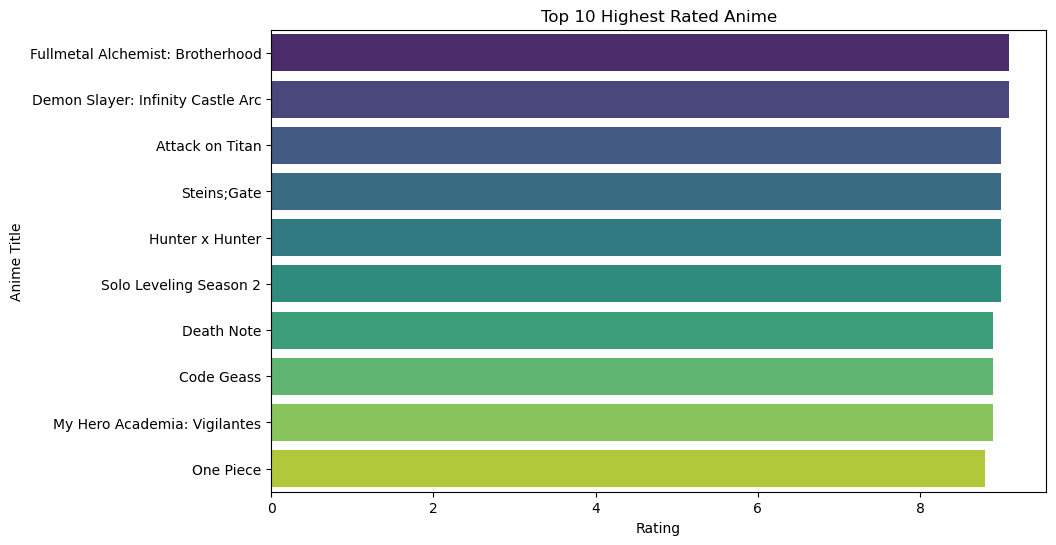

In [17]:
# Top 10 Highest Rated Anime
top_anime = df.nlargest(10, 'rating')
plt.figure(figsize=(10, 6))
sns.barplot(y=top_anime['title'], x=top_anime['rating'], palette='viridis')
plt.title('Top 10 Highest Rated Anime')
plt.xlabel('Rating')
plt.ylabel('Anime Title')
plt.show()

#### ----------------------------- Average rating of anime by it's release year---------------------------------------------

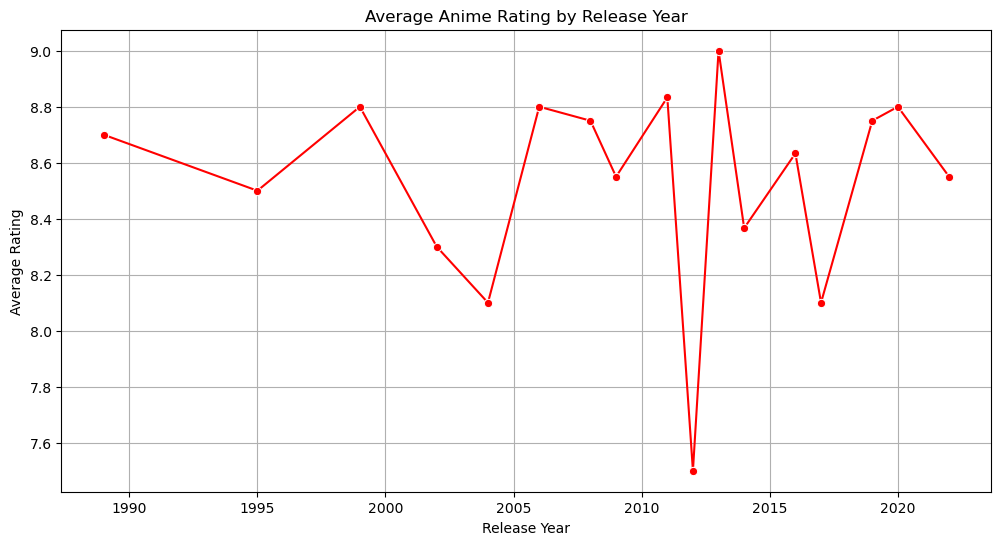

In [18]:
#Average Rating by Release Year
plt.figure(figsize=(12, 6))
sns.lineplot(data=df.groupby('release_year')['rating'].mean(), marker='o', color='red')
plt.title('Average Anime Rating by Release Year')
plt.xlabel('Release Year')
plt.ylabel('Average Rating')
plt.grid()
plt.show()

In [19]:
# Convert genre column into multiple categories
df['genre_list'] = df['genre'].str.split(', ')

#### ------------------------------------------Genre Wise rating distribution---------------------------------------------

C:\Users\nirde\AppData\Local\Temp\ipykernel_11504\336882734.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=genre_ratings.index, x=genre_ratings.values, palette='coolwarm')


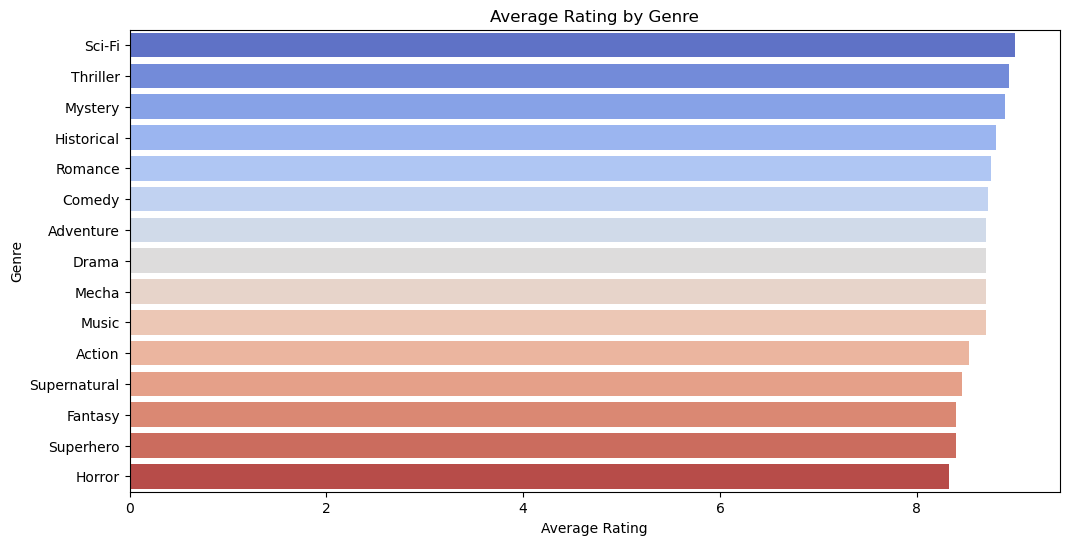

In [20]:
## 1. Genre-wise Rating Distribution
genre_ratings = df.explode('genre_list').groupby('genre_list')['rating'].mean().sort_values(ascending=False)
plt.figure(figsize=(12, 6))
sns.barplot(y=genre_ratings.index, x=genre_ratings.values, palette='coolwarm')
plt.title('Average Rating by Genre')
plt.xlabel('Average Rating')
plt.ylabel('Genre')
plt.show()

#### ----------------------------------Correlation graph between the episodes and rating------------------------------

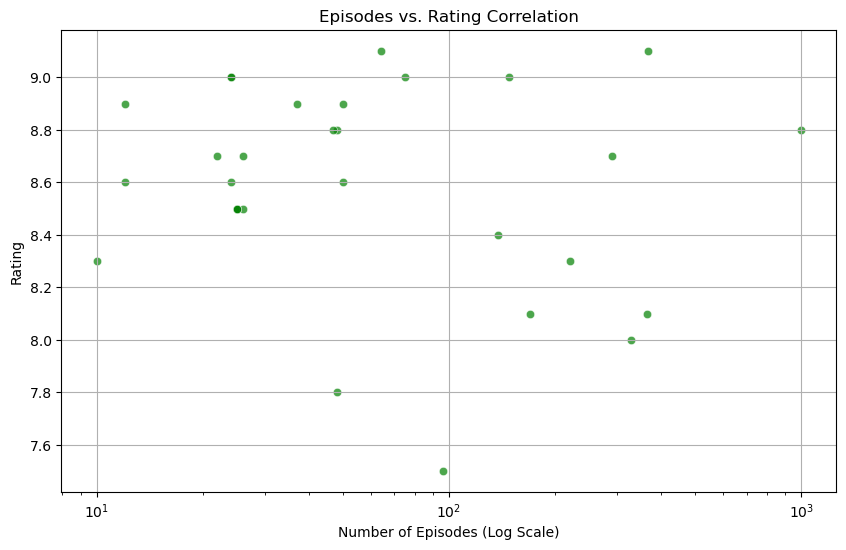

In [21]:
# Episodes vs. Rating Correlation
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df['episodes'], y=df['rating'], alpha=0.7, color='green')
plt.xscale('log')  # Log scale for better visualization
plt.title('Episodes vs. Rating Correlation')
plt.xlabel('Number of Episodes (Log Scale)')
plt.ylabel('Rating')
plt.grid(True)
plt.show()

#### -----------------------comparison graph between the new vs old anime--------------------------------

C:\Users\nirde\AppData\Local\Temp\ipykernel_11504\2523795383.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=era_avg_rating.index, y=era_avg_rating.values, palette='magma')


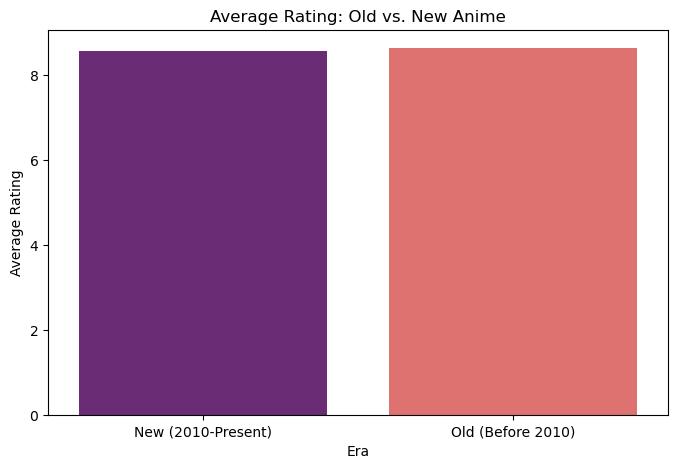

In [22]:
# New vs. Old Anime Comparison (Before & After 2010)
df['era'] = df['release_year'].apply(lambda x: 'Old (Before 2010)' if x < 2010 else 'New (2010-Present)')
era_avg_rating = df.groupby('era')['rating'].mean()
plt.figure(figsize=(8, 5))
sns.barplot(x=era_avg_rating.index, y=era_avg_rating.values, palette='magma')
plt.title('Average Rating: Old vs. New Anime')
plt.xlabel('Era')
plt.ylabel('Average Rating')
plt.show()

#### ----------------------------------Most popular anime that has long acr------------------------------------------

C:\Users\nirde\AppData\Local\Temp\ipykernel_11504\2600127108.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=top_episodes['title'], x=top_episodes['episodes'], palette='plasma')


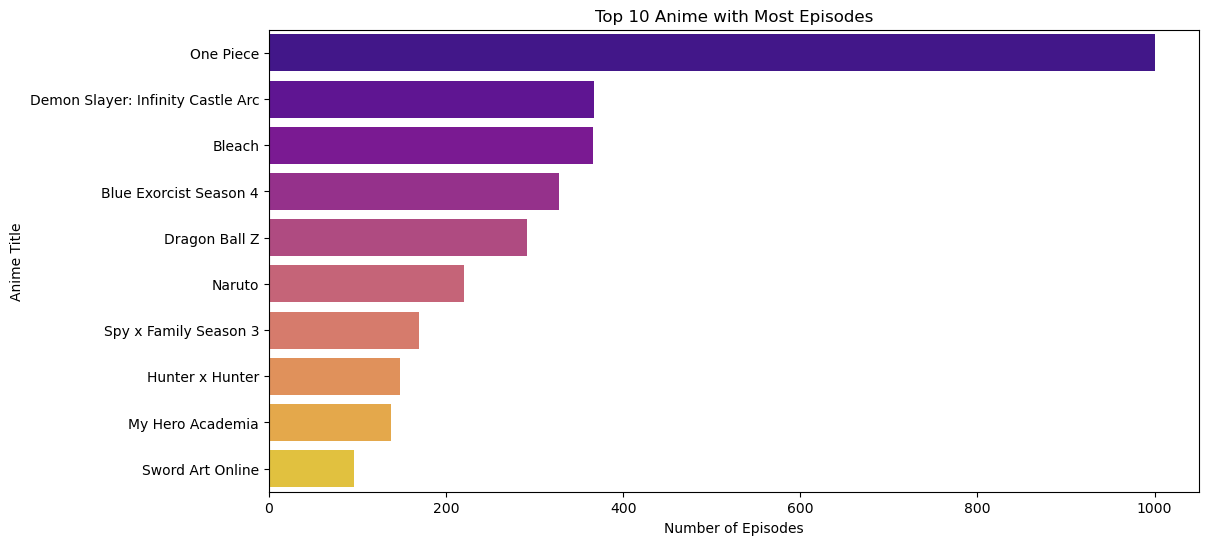

In [23]:
# Most Popular Anime Based on Number of Episodes
top_episodes = df.nlargest(10, 'episodes')
plt.figure(figsize=(12, 6))
sns.barplot(y=top_episodes['title'], x=top_episodes['episodes'], palette='plasma')
plt.title('Top 10 Anime with Most Episodes')
plt.xlabel('Number of Episodes')
plt.ylabel('Anime Title')
plt.show()

In [24]:
# Extract Season Based on Release Year
def get_season(year):
    if year % 4 == 0: return 'Winter'
    elif year % 4 == 1: return 'Spring'
    elif year % 4 == 2: return 'Summer'
    else: return 'Fall'

df['season'] = df['release_year'].apply(get_season)

C:\Users\nirde\AppData\Local\Temp\ipykernel_11504\3306529773.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=season_avg_rating.index, y=season_avg_rating.values, palette='coolwarm')


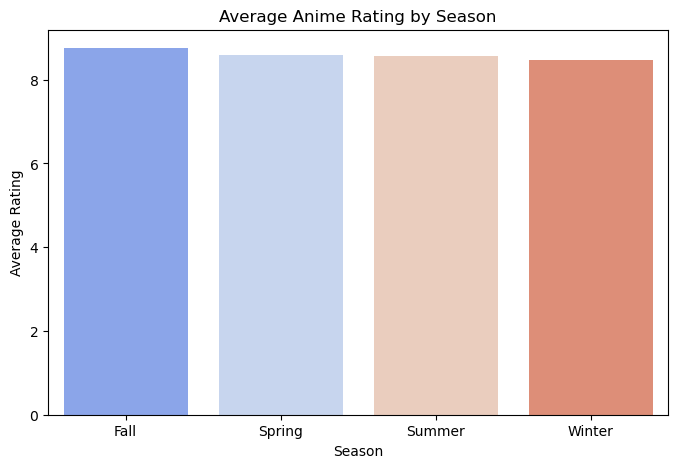

In [25]:
## Seasonal Trends in Anime Ratings
season_avg_rating = df.groupby('season')['rating'].mean().sort_values(ascending=False)
plt.figure(figsize=(8, 5))
sns.barplot(x=season_avg_rating.index, y=season_avg_rating.values, palette='coolwarm')
plt.title('Average Anime Rating by Season')
plt.xlabel('Season')
plt.ylabel('Average Rating')
plt.show()

#### ------------------------------------Evolution of anime over the decade------------------------------------------ 

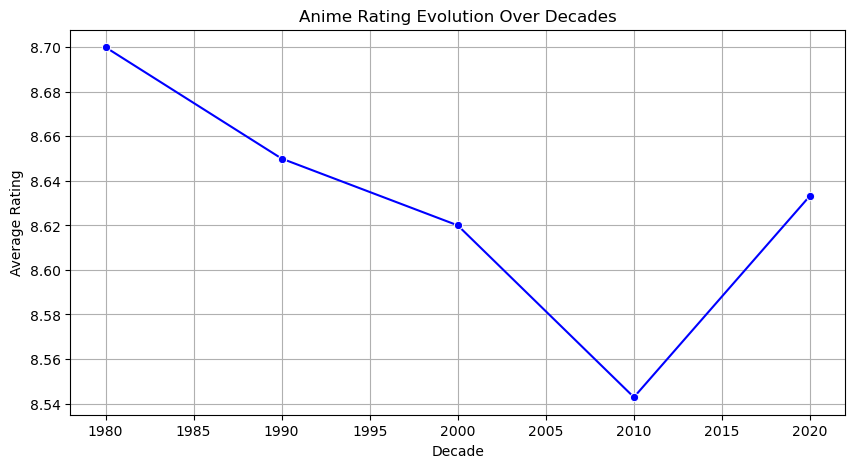

In [26]:
## Decade-wise Evolution of Anime Ratings
df['decade'] = (df['release_year'] // 10) * 10
decade_avg_rating = df.groupby('decade')['rating'].mean()
plt.figure(figsize=(10, 5))
sns.lineplot(x=decade_avg_rating.index, y=decade_avg_rating.values, marker='o', color='blue')
plt.title('Anime Rating Evolution Over Decades')
plt.xlabel('Decade')
plt.ylabel('Average Rating')
plt.grid()
plt.show()

#### ----------------------------------- Episode Count vs. Popularity ---------------------------------------------

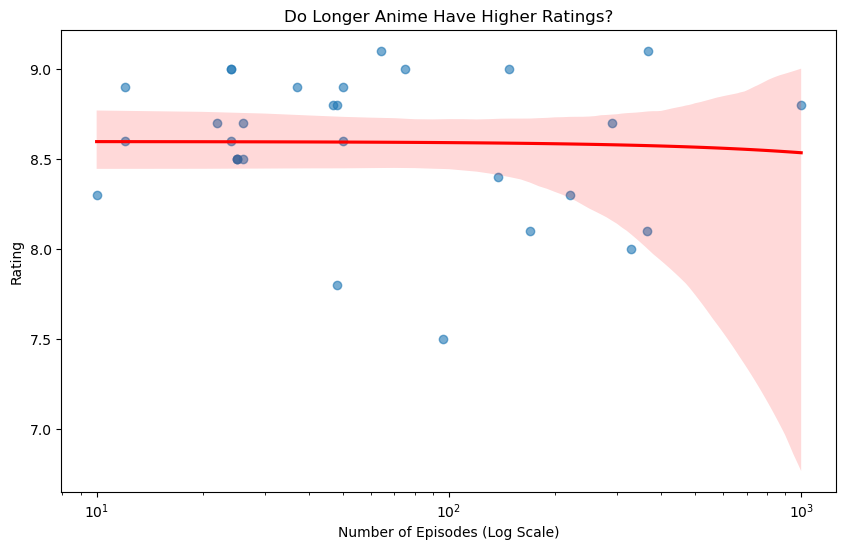

In [27]:
## Episode Count vs. Popularity (Scatter with Trend Line)
plt.figure(figsize=(10, 6))
sns.regplot(x=df['episodes'], y=df['rating'], scatter_kws={'alpha': 0.6}, line_kws={'color': 'red'})
plt.xscale('log')
plt.title('Do Longer Anime Have Higher Ratings?')
plt.xlabel('Number of Episodes (Log Scale)')
plt.ylabel('Rating')
plt.show()

In [28]:
from collections import Counter
from itertools import combinations
# Create Genre Pairs
genre_pairs = []
for genres in df['genre_list']:
    genre_pairs.extend(combinations(sorted(genres), 2))

In [29]:
# Count Co-occurrences
genre_counts = pd.DataFrame(Counter(genre_pairs).items(), columns=['Genre Pair', 'Count']).sort_values(by='Count', ascending=False)

#### -------------------------Top 10 most common genre combination that mostly watched------------------

C:\Users\nirde\AppData\Local\Temp\ipykernel_11504\731980784.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=genre_counts['Genre Pair'][:10].astype(str), x=genre_counts['Count'][:10], palette='magma')


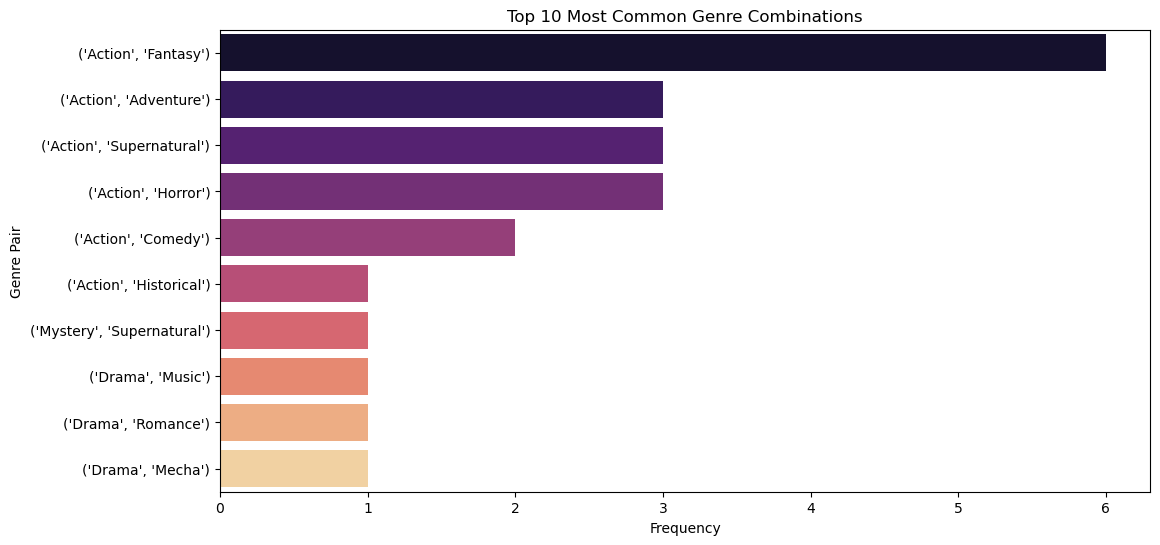

In [30]:
# Top 10 Most Common Genre Combinations
plt.figure(figsize=(12, 6))
sns.barplot(y=genre_counts['Genre Pair'][:10].astype(str), x=genre_counts['Count'][:10], palette='magma')
plt.title('Top 10 Most Common Genre Combinations')
plt.xlabel('Frequency')
plt.ylabel('Genre Pair')
plt.show()

#### --------------------------------------Outlier Detection in Anime Ratings---------------------------------------

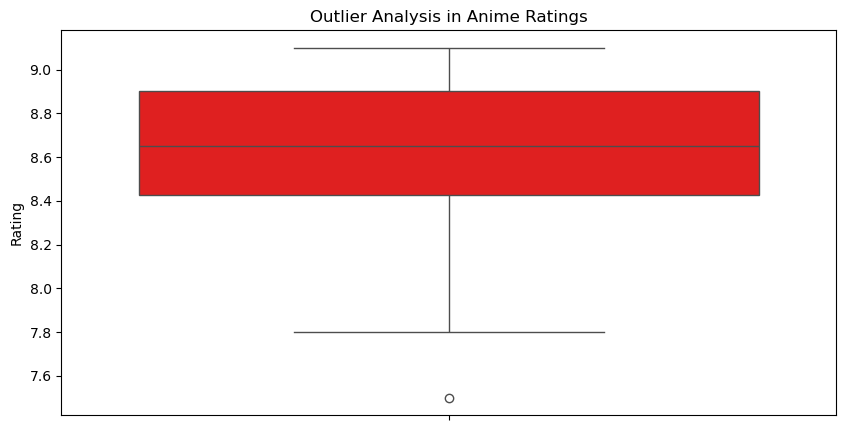

In [31]:
## Outlier Detection in Anime Ratings
plt.figure(figsize=(10, 5))
sns.boxplot(y=df['rating'], color='red')
plt.title('Outlier Analysis in Anime Ratings')
plt.ylabel('Rating')
plt.show()

#### ----------------------------------Top rated anime based on the years------------------------------------------------

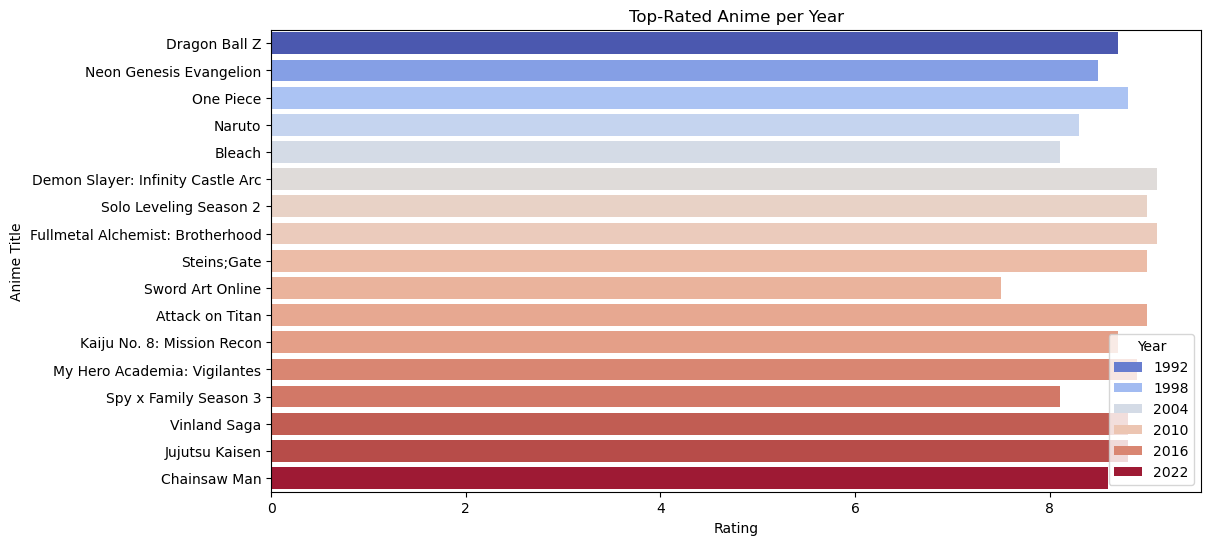

In [32]:
# Get the top-rated anime for each year
top_rated_per_year = df.loc[df.groupby('release_year')['rating'].idxmax()][['release_year', 'title', 'rating']]

# Plotting
plt.figure(figsize=(12, 6))
sns.barplot(y=top_rated_per_year['title'], x=top_rated_per_year['rating'], hue=top_rated_per_year['release_year'], palette='coolwarm')
plt.title('Top-Rated Anime per Year')
plt.xlabel('Rating')
plt.ylabel('Anime Title')
plt.legend(title='Year', loc='lower right')
plt.show()